In [45]:
import med_dataloader as med_dl

In [46]:
import shutil

try:
    shutil.rmtree("Test_Dataset_segmentation_TF")
except:
    pass

In [47]:
num_classes = 3

med_dl.generate_dataset(data_dir=r"Test_Dataset_segmentation",
                        imgA_label="CT",
                        imgB_label="Labels",
                        input_size=192,
                        is_B_categorical=True,
                        num_classes=num_classes,
                        norm_boundsA=None,
                        norm_boundsB=None,
                        use_3D=False,
                        )

train_ds, valid_ds, test_ds = med_dl.get_dataset(data_dir=r"Test_Dataset_segmentation_TF",
                                                 percentages=[1,0,0],
                                                 batch_size=1,
                                                 train_augmentation=True,
                                                 random_crop_size=None,
                                                 random_rotate=False,
                                                 random_flip=False,
                                                 )


Caching decoded images in Test_Dataset_segmentation_TF\CT.cache...
576/3
Cached decoded images in Test_Dataset_segmentation_TF\CT.cache.
Caching decoded images in Test_Dataset_segmentation_TF\Labels.cache...
576/3
Cached decoded images in Test_Dataset_segmentation_TF\Labels.cache.


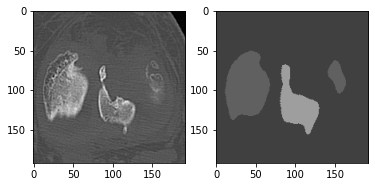

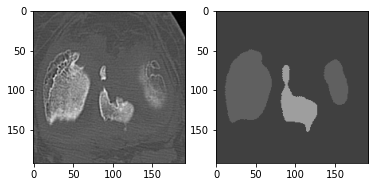

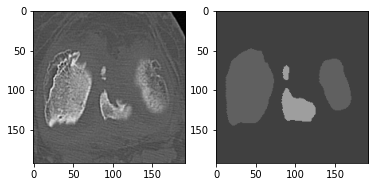

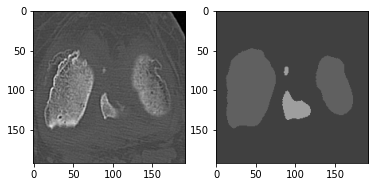

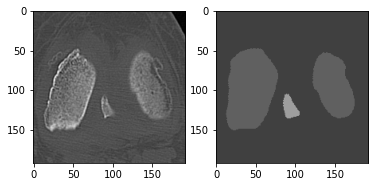

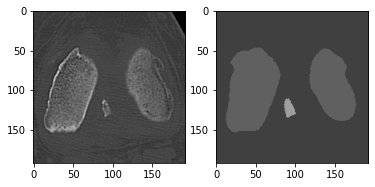

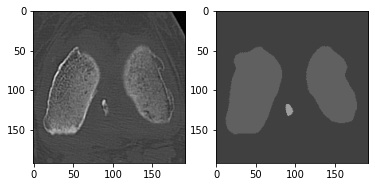

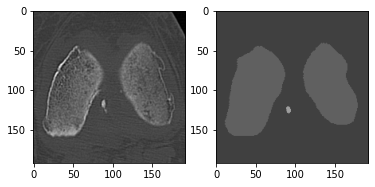

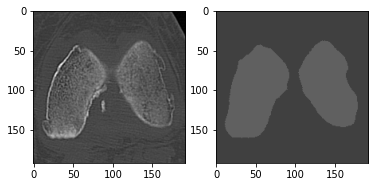

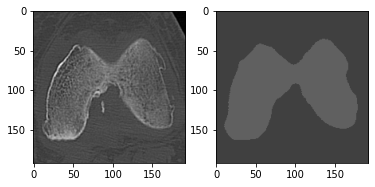

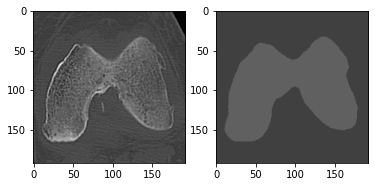

In [50]:
import matplotlib.pyplot as plt

for batch in train_ds.take(2):
    volume_batch, label_batch = batch
    for volume, label in zip(volume_batch, label_batch):
        plt.subplot(121)
        plt.imshow(volume[:,:,0], cmap="gray")
        plt.subplot(122)
        for i in range(num_classes):
            plt.imshow(label[:,:,i], cmap="gray", alpha=0.5)
        plt.show()
    